# Part 2: Basic Linear Regression

The Data used in this notebook can be found on the Kaggle competition page. Here is the description of the challenge (from Kaggle): 

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

(https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', -1)

In this notebook we will start by taking our processed data from the last notebook and creating a Linear Regression Model. We can then use the resisduals from our models prediction to improve our model. This includes adding new features. Finally, we can assess the RMSLE score for our model. 

## Step 1: Clean and Randomize the Data

Our first step is the to import our cleaned dataset from Part 1. We should also take a look at the shape and which Features we selected from the last Notebook.

In [260]:
data_location = 'housing_data.csv'
df_orig = pd.read_csv(data_location)

df.shape
df.columns

Index(['ExterQual', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'GarageFinish',
       'OverallQual', 'YearBuilt', 'MasVnrArea', 'GrLivArea', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'TotalSF', 'TotalBath', 'SalePrice',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
     

We should also randomize and split our data into testing, training, and validation sets. 

In [303]:
#In this cell we are randomizing the data and splitting it. 

np.random.seed(0) 

rand_split = np.random.rand(len(df))  
train_list = rand_split < 0.7
valid_list = (rand_split >= 0.7) & (rand_split < 0.85)
test_list = rand_split >= 0.85

In [304]:
#set up dataframes we will use for our model training

df_X = df.drop(columns= 'SalePrice')
df_y = df['SalePrice']

train_X = df_X[train_list]
train_y = df_y[train_list]

test_X = df_X[test_list]
test_y = df_y[test_list]

valid_X = df_X[valid_list]
valid_y = df_y[valid_list]

In our last notebook we also saved a csv with the original values, including the untransformed sales price. 

In [305]:
#additionally we want to get our original Sale Values

data_location_original = 'housing_data_original.csv'
df_orig = pd.read_csv(data_location_original)


#create arrays of our original prices
train_Price = df_orig[train_list]['SalePrice']
test_Price = df_orig[test_list]['SalePrice']
valid_Price = df_orig[valid_list]['SalePrice']

## Step 2: Implement Basic Linear Regression

Now we can implement our Basic Linear Regression model. In this cell we will import the algorithm and fit our training data. 

In [264]:
from sklearn.linear_model import LinearRegression

linear= LinearRegression()
linear.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

This function thats gives us the metrics for our prediction, the actual prediction values (not log), and our resisduals

In [306]:

def rmsle(true_y,pred_y,predictions= False):
    
    rmsle = np.sqrt(np.sum((np.log1p(true_y) - (pred_y))**2)/len(true_y))
    predictions_y = np.e**pred_y
    res = np.array(true_y) - predictions_y
    if predictions:
        return res, rmsle, predictions_y
    else:
        return res, rmsle     

After training our model, we should evaluate how it does against the Training Dataset and the testing Dataset. 

r2 score = 0.8968998633589611
RMSLE = 0.13056510148272715
(1017, 60)


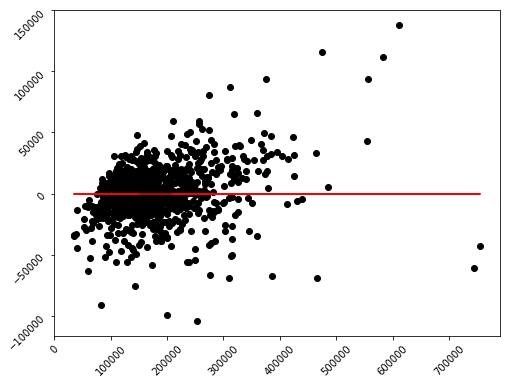

In [266]:
#See how our model does in the training data set

train_r2 = linear.score(train_X,train_y)
train_pred_raw = linear.predict(train_X)

train_res,train_rmsle = rmsle(train_Price, train_pred_raw)

print(f'r2 score = {train_r2}')
print(f'RMSLE = {train_rmsle}')


f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(labelrotation=45)
print(train_X.shape)
plt.plot(train_Price, train_res, 'ko')
plt.plot(train_Price, [0]*len(train_Price),'r')

r2 score = 0.7846785783133222
RMSLE = 0.17693547527735898


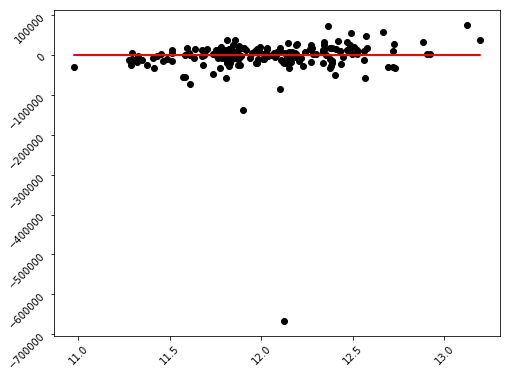

In [267]:
#see how our model preforms in the validation data set

valid_r2 = linear.score(valid_X,valid_y)
valid_pred = linear.predict(valid_X)

valid_res, valid_rmsle = rmsle(valid_Price, valid_pred)

print(f'r2 score = {valid_r2}')
print(f'RMSLE = {valid_rmsle}')

f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(labelrotation=45)

plt.plot(valid_Price, valid_res, 'ko')
plt.plot(valid_Price, [0]*len(valid_y),'r')

As expected our Data does better against the Training Dataset.

In [268]:
print('Training Model Performance (First Model):')
print(f'r2 score = {train_r2}')
print(f'RMSLE = {train_rmsle}')

print('\nValidation Model Performance (First Model):')
print(f'r2 score = {valid_r2}')
print(f'RMSLE = {valid_rmsle}')

Training Model Performance (First Model):
r2 score = 0.8968998633589611
RMSLE = 0.13056510148272715

Validation Model Performance (First Model):
r2 score = 0.7846785783133222
RMSLE = 0.17693547527735898


## Step 3: Check Resisduals and Implement More Features

In [269]:
#import dataset with cataogical values to examine our models accuracy feature by feature 

train_orig = df_orig[train_list]
train_orig['Residuals'] = train_res
train_X_wr= train_X.copy() #create new dataframe for visualzing residuals 
train_X_wr['Residuals'] = train_res

valid_orig = df_orig[valid_list]
valid_orig['Residuals'] = valid_res
valid_X_wr= valid_X.copy() #create new dataframe for visualzing residuals 
valid_X_wr['Residuals'] = valid_res

[i for i in train_orig.columns if train_orig[i].dtype == 'object']

['ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'KitchenQual',
 'GarageFinish',
 'Neighborhood',
 'HouseStyle',
 'Foundation',
 'GarageType']

In [270]:
#check the resisduals for the numeric features
     
[i for i in train_orig.columns if train_orig[i].dtype != 'object']

['OverallQual',
 'YearBuilt',
 'MasVnrArea',
 'GrLivArea',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'TotalSF',
 'TotalBath',
 'SalePrice',
 'Residuals']

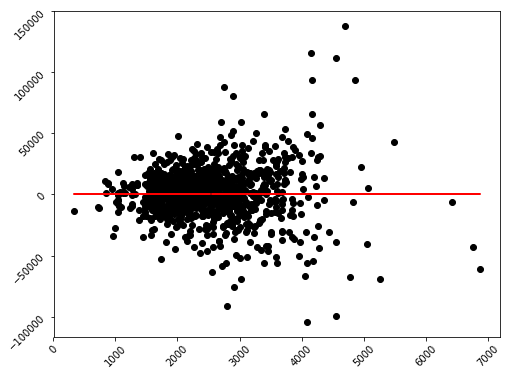

In [271]:
#'YearBuilt','MasVnrArea','TotalSF','GrLivArea','GarageArea', 'TotalBath'

var='TotalSF'

f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(labelrotation=45)

plt.plot(train_X[var], train_res, 'ko')
plt.plot(train_X[var], [0]*len(train_res),'r')

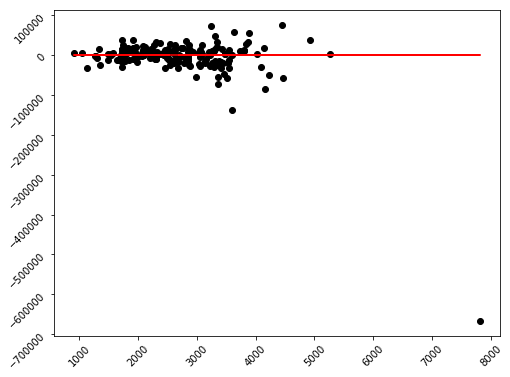

In [272]:
f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(labelrotation=45)

plt.plot(valid_X[var], valid_res, 'ko')
plt.plot(valid_X[var], [0]*len(valid_res),'r')

## Step 4: Check Resisduals Against Unused Features

We can use our resisduals to help build a better model. This includes checking our resisduals against unused Features and seeing if there is correlation between them. This is a sign that we should include that Features in our adjusted Model.

In [273]:
#Re-import our raw housing data to check features that we did not use in our first model

data_location= 'raw_housing_data.csv'
df_recheck = pd.read_csv(data_location, low_memory=False)
df_recheck['Id'] = df_recheck['Id'] - 1

df_recheck=df_recheck.set_index('Id')

In [274]:
#preofrm 


train_recheck = df_recheck[train_list]

valid_recheck = df_recheck[valid_list]

test_recheck = df_recheck[test_list]


In [275]:
cols= [i for i in train_recheck.columns if i not in train_orig.columns]

train_recheck = train_recheck[cols]
train_recheck['Residuals'] = train_res

valid_recheck = valid_recheck[cols]
valid_recheck['Residuals'] = valid_res

#test_recheck = test_recheck[cols]
#test_recheck['Residuals'] = test_res

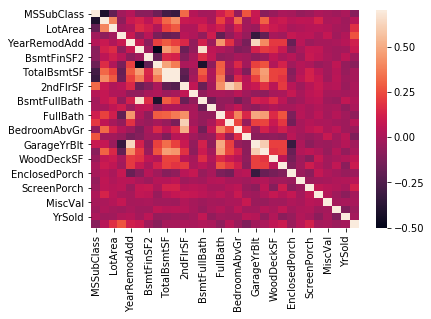

In [276]:
#check coorelation of unused numerical features against the resisduals

import seaborn as sns

corr_mat= train_recheck.corr()
f, ax= plt.subplots()
sns.heatmap(corr_mat,vmax=.7)

In [277]:
#find ones with high coorelation, LotArea and OverallCond

pre_corr_dict = {k:v for k,v in zip(corr_mat.index, corr_mat['Residuals']) if abs(v)>.20}
pre_corr_dict

{'OverallCond': 0.2672063960583788, 'Residuals': 1.0}

When looking at our numerical variables, only OverallCond stands out as a Feature we should add to our adjusted Model. Next we can check our caterogorical variables.

In [308]:
print([i for i in train_recheck.columns if train_recheck[i].dtype == 'object'])

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


(1460, 80)


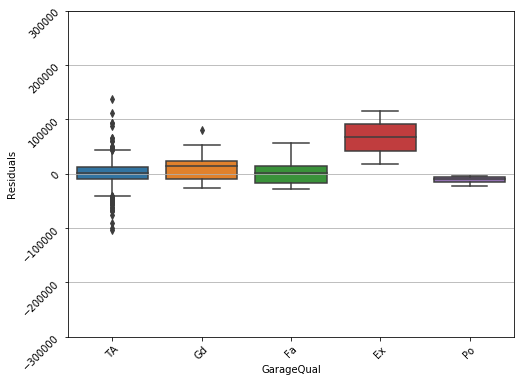

In [309]:
#check categorical ununsed features against resisduals, MSZoning, GarageQual

var = 'GarageQual'
data = pd.concat([train_recheck, train_Price], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.grid('on')
ax.tick_params(labelrotation=45)
fig = sns.boxplot(x=var, y="Residuals", data=data)
fig.axis(ymin=-300000, ymax=300000);

print(df_recheck.shape)

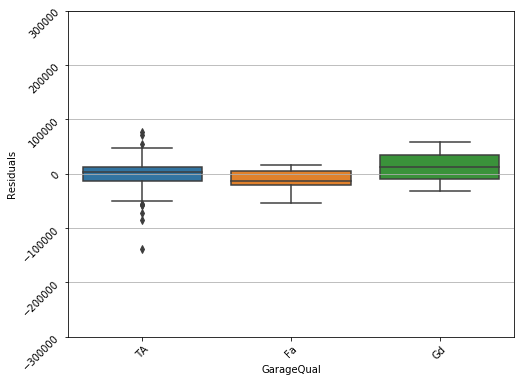

In [310]:
data = pd.concat([valid_recheck, valid_Price], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.grid('on')
ax.tick_params(labelrotation=45)
fig = sns.boxplot(x=var, y="Residuals", data=data)
fig.axis(ymin=-300000, ymax=300000);

After looking through all our variables, we can add in MSZoning (whether or not Commerical), OverallCond, and GarageQual. We will name our new Dataset df_X_adj

In [312]:
#OverallCond, MSZoning (C), GarageQual

replace = {'OverallCond': {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:3}, 
           'GarageQual': {'TA': 1, 'Gd': 2, 'Fa': 1, 'Ex': 3,'Po': 1, 'NoGar': 0}}
            
new_cols = ['OverallCond', 'GarageQual']

df_add = df_recheck[new_cols]

df_add['CommerZone']=0
df_add.loc[df_recheck['MSZoning'] == 'C','CommerZone']=1

df_add = df_add.fillna({'GarageQual':'NoGar','OverallCond':5})

for i  in (replace.keys()):
    df_add[i] = df_add[i].map(replace[i])
    
df_X_adj = pd.concat([df_X, df_add], axis=1)

for j in ['MasVnrArea','GrLivArea','GarageArea','TotalSF']:
    df_X_adj.loc[:,j] = np.log1p(df_X_adj[j])
    
(df_X_adj.head())

,ExterQual,BsmtQual,BsmtExposure,KitchenQual,GarageFinish,OverallQual,YearBuilt,MasVnrArea,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageArea,TotalSF,TotalBath,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGar,OverallCond,GarageQual,CommerZone
0,5,4,3,4,4,7,17,5.283204,7.444833,8,0,6.308098,7.850493,3.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,0
1,3,4,5,3,4,6,44,0.000000,7.141245,6,1,6.133398,7.833996,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,1,0
2,5,4,4,4,4,7,19,5.093750,7.488294,6,1,6.411818,7.903596,3.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,0
3,3,3,3,4,3,7,105,0.000000,7.448916,7,1,6.466145,7.813592,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0
4,5,4,4,4,4,8,20,5.860786,7.695758,9,1,6.729824,8.114923,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,0


## Step 5: Create Adjusted Model

Now we can create our adjusted model. Starting again by fitting the data. 

In [313]:

train_adj_X = df_X_adj[train_list]

test_adj_X = df_X_adj[test_list]

valid_adj_X = df_X_adj[valid_list]

In [314]:
adj_model = LinearRegression()

adj_model.fit(train_adj_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We will now asses how well our model does against the training set and validation set. Graphically, we can clearly see there is an outlier in the validation set

r2 score = 0.9109614520914779
RMSLE = 0.12133512015350667


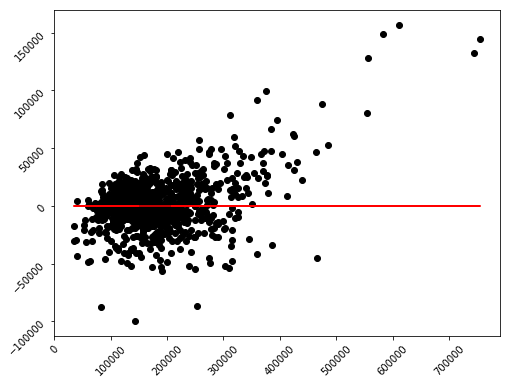

In [315]:
#See how our model does in the training data set

train_adj_r2 = adj_model.score(train_adj_X,train_y)
train_adj_pred_raw = adj_model.predict(train_adj_X)

train_adj_res,train_adj_rmsle = rmsle(train_Price, train_adj_pred_raw)

print(f'r2 score = {train_adj_r2}')
print(f'RMSLE = {train_adj_rmsle}')


f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(labelrotation=45)
plt.plot(train_Price, train_adj_res, 'ko')
plt.plot(train_Price, [0]*len(train_Price),'r')

r2 score = 0.8402995665257933
RMSLE = 0.15237872842474212


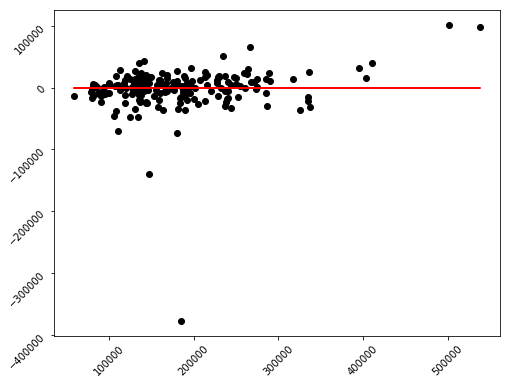

In [316]:

valid_adj_r2 = adj_model.score(valid_adj_X,valid_y)
valid_adj_pred_raw = adj_model.predict(valid_adj_X)

valid_adj_res,valid_adj_rmsle = rmsle(valid_Price, valid_adj_pred_raw)

print(f'r2 score = {valid_adj_r2}')
print(f'RMSLE = {valid_adj_rmsle}')


f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(labelrotation=45)
plt.plot(valid_Price, valid_adj_res, 'ko')
plt.plot(valid_Price, [0]*len(valid_Price),'r')

We can take a look to see how how much influence each Feature has in our model.

In [317]:
{k:v for k,v in zip(train_adj_X.columns,adj_model.coef_)}

{'ExterQual': 0.00042524533190336047,
 'BsmtQual': 0.03146452709352417,
 'BsmtExposure': 0.03980316703917261,
 'KitchenQual': 0.04129872319186925,
 'GarageFinish': 0.015649729560058945,
 'OverallQual': 0.05214715524757385,
 'YearBuilt': -0.0014689161716215926,
 'MasVnrArea': -0.0009677615816556517,
 'GrLivArea': 0.23676906735917203,
 'TotRmsAbvGrd': 0.010457356320645775,
 'Fireplaces': 0.03893353634799939,
 'GarageArea': 0.07952309462819848,
 'TotalSF': 0.2377993100033989,
 'TotalBath': 0.04789551904394643,
 'Neighborhood_Blmngtn': -0.1390030387452951,
 'Neighborhood_Blueste': -0.09994164272730824,
 'Neighborhood_BrDale': -0.10783723551104413,
 'Neighborhood_BrkSide': 0.07474467837813617,
 'Neighborhood_ClearCr': 0.06392358908875981,
 'Neighborhood_CollgCr': 0.012605312003838527,
 'Neighborhood_Crawfor': 0.14007227574116618,
 'Neighborhood_Edwards': -0.028813083239872125,
 'Neighborhood_Gilbert': 0.009271258511672445,
 'Neighborhood_IDOTRR': -0.13129058053132103,
 'Neighborhood_MeadowV

In [318]:
print('Training Model Performance (First Model):')
print(f'r2 score = {train_r2}')
print(f'RMSLE = {train_rmsle}')

print('\nValidation Model Performance (First Model):')
print(f'r2 score = {valid_r2}')
print(f'RMSLE = {valid_rmsle}')

print('--------------------------------------------------')

print('\nTraining Model Performance (Adjusted Model):')
print(f'r2 score = {train_adj_r2}')
print(f'RMSLE = {train_adj_rmsle}')

print('\nValidation Model Performance (Adjusted Model):')
print(f'r2 score = {valid_adj_r2}')
print(f'RMSLE = {valid_adj_rmsle}')

Training Model Performance (First Model):
r2 score = 0.8968998633589611
RMSLE = 0.13056510148272715

Validation Model Performance (First Model):
r2 score = 0.7846785783133222
RMSLE = 0.17693547527735898
--------------------------------------------------

Training Model Performance (Adjusted Model):
r2 score = 0.9109614520914779
RMSLE = 0.12133512015350667

Validation Model Performance (Adjusted Model):
r2 score = 0.8402995665257933
RMSLE = 0.15237872842474212


We can also see how our adjusted model does compared to our original model on the testing set.

r2 score = 0.7415775539117133
RMSLE = 0.1927776336828899


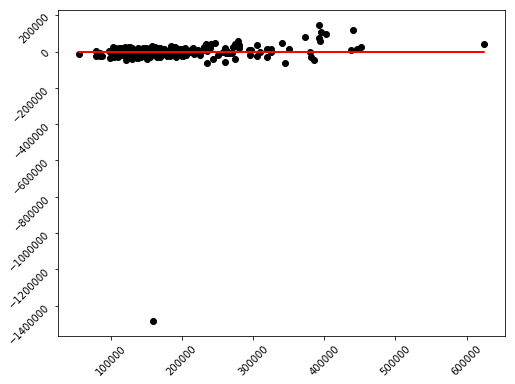

In [319]:
test_r2 = linear.score(test_X,test_y)
test_pred_raw = linear.predict(test_X)

test_res,test_rmsle = rmsle(test_Price, test_pred_raw)

print(f'r2 score = {test_r2}')
print(f'RMSLE = {test_rmsle}')


f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(labelrotation=45)
plt.plot(test_Price, test_res, 'ko')
plt.plot(test_Price, [0]*len(test_Price),'r')

r2 score = 0.8345699907982692
RMSLE = 0.15424058918800312


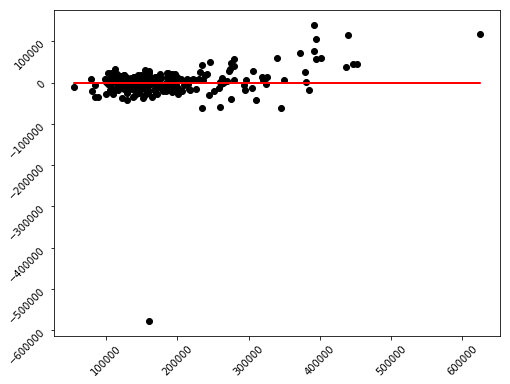

In [320]:
test_adj_r2 = adj_model.score(test_adj_X,test_y)
test_adj_pred_raw = adj_model.predict(test_adj_X)

test_adj_res,test_adj_rmsle = rmsle(test_Price, test_adj_pred_raw)

print(f'r2 score = {test_adj_r2}')
print(f'RMSLE = {test_adj_rmsle}')


f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(labelrotation=45)
plt.plot(test_Price, test_adj_res, 'ko')
plt.plot(test_Price, [0]*len(test_Price),'r')

Running the adjusted model we can easily spot the outlier. We will remove them for future training since they will likely hurt our models training ability. 

r2 score = 0.8908939230567035
RMSLE = 0.13189773073369757


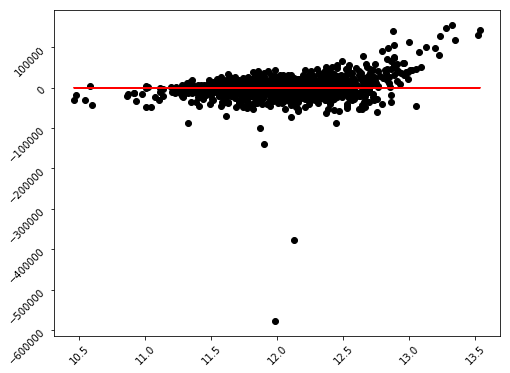

In [321]:
#run model on complete dataset to identify outliers 

adj_r2 = adj_model.score(df_X_adj,df_y)
adj_pred_raw = adj_model.predict(df_X_adj)

adj_res,adj_rmsle = rmsle(df_orig['SalePrice'], adj_pred_raw)

print(f'r2 score = {adj_r2}')
print(f'RMSLE = {adj_rmsle}')


f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(labelrotation=45)
plt.plot(df_y, adj_res, 'ko')
plt.plot(df_y, [0]*len(df_y),'r')

In [322]:
df_X_adj['SalePrice'] = df_y

df_X_adj[adj_res>-300000].to_csv('housing_data_final.csv',index=False) #exclude outlier from our final training dataset

Fin